# Get data and first lookup

## Get data

### Download and extract files

In [ ]:
import zipfile
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data

zip_ref = zipfile.ZipFile("nlp_getting_started.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-11-03 08:14:50--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.128, 172.217.219.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2021-11-03 08:14:50 (90.4 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



### Reading file 


In [ ]:
import pandas as pd

pd.set_option("display.max_colwidth", -1)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


## Lookup

### Shape and head

In [ ]:
print(train_data.shape ,test_data.shape)

train_data.head()

(7613, 5) (3263, 4)


id keyword location  \
0  1   NaN     NaN       
1  4   NaN     NaN       
2  5   NaN     NaN       
3  6   NaN     NaN       
4  7   NaN     NaN       

                                                                                                                                    text  \
0  Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all                                                                   
1  Forest fire near La Ronge Sask. Canada                                                                                                  
2  All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected   
3  13,000 people receive #wildfires evacuation orders in California                                                                        
4  Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school                                                 

   target  
0  1       
1  1       
2  1       
3  1       
4  1

### Info

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
train_data

id                keyword  \
0     1      NaN                     
1     4      NaN                     
2     5      NaN                     
3     6      NaN                     
4     7      NaN                     
5     8      NaN                     
6     10     NaN                     
7     13     NaN                     
8     14     NaN                     
9     15     NaN                     
10    16     NaN                     
11    17     NaN                     
12    18     NaN                     
13    19     NaN                     
14    20     NaN                     
15    23     NaN                     
16    24     NaN                     
17    25     NaN                     
18    26     NaN                     
19    28     NaN                     
20    31     NaN                     
21    32     NaN                     
22    33     NaN                     
23    34     NaN                     
24    36     NaN                     
25    37     NaN                     
26    38     NaN                     
27    39     NaN                     
28    40     NaN                     
29    41     NaN                     
30    44     NaN                     
31    48     ablaze                  
32    49     ablaze                  
33    50     ablaze                  
34    52     ablaze                  
35    53     ablaze                  
36    54     ablaze                  
37    55     ablaze                  
38    56     ablaze                  
39    57     ablaze                  
40    59     ablaze                  
41    61     ablaze                  
42    62     ablaze                  
43    63     ablaze                  
44    64     ablaze                  
45    65     ablaze                  
46    66     ablaze                  
47    67     ablaze                  
48    68     ablaze                  
49    71     ablaze                  
50    73     ablaze                  
51    74     ablaze                  
52    76     ablaze                  
53    77     ablaze                  
54    78     ablaze                  
55    79     ablaze                  
56    80     ablaze                  
57    81     ablaze                  
58    82     ablaze                  
59    83     ablaze                  
60    85     ablaze                  
61    86     ablaze                  
62    89     ablaze                  
63    91     ablaze                  
64    92     ablaze                  
65    93     ablaze                  
66    95     ablaze                  
67    96     accident                
68    97     accident                
69    98     accident                
70    100    accident                
71    102    accident                
72    104    accident                
73    105    accident                
74    107    accident                
75    109    accident                
76    110    accident                
77    112    accident                
78    113    accident                
79    114    accident                
80    117    accident                
81    118    accident                
82    119    accident                
83    120    accident                
84    121    accident                
85    126    accident                
86    128    accident                
87    129    accident                
88    130    accident                
89    131    accident                
90    132    accident                
91    133    accident                
92    134    accident                
93    135    accident                
94    136    accident                
95    137    accident                
96    138    accident                
97    139    accident                
98    141    accident                
99    143    accident                
100   144    accident                
101   145    accident                
102   146    aftershock              
103   149    aftershock              
104   151    afters

### Count nan values

In [ ]:
# Detecting null values and records
import numpy as np

wholeData = pd.concat([train_data, test_data], axis = 0).reset_index(drop = True)
nulls = pd.DataFrame(np.c_[wholeData.isnull().sum(), (wholeData.isnull().sum()/ len(wholeData))*100],
                     columns = ['# of nulls', '% of nulls'],
                     index = wholeData.columns)
nulls

# of nulls  % of nulls
id        0.0         0.000000  
keyword   87.0        0.799926  
location  3638.0      33.449798 
text      0.0         0.000000  
target    3263.0      30.001839

As we can see there are some null values for keywords and more important locations.

**Note**: 30% nulls for target is common because our test data dosen't have target and we should predict for task.

# EDA

## Extract the Locations and Keywords

### Locations

In [ ]:
for dataframe in [train_data, test_data, wholeData]:

   dataframe.keyword.fillna('no-keyword', inplace = True)
   dataframe.location.fillna('no-location', inplace = True)

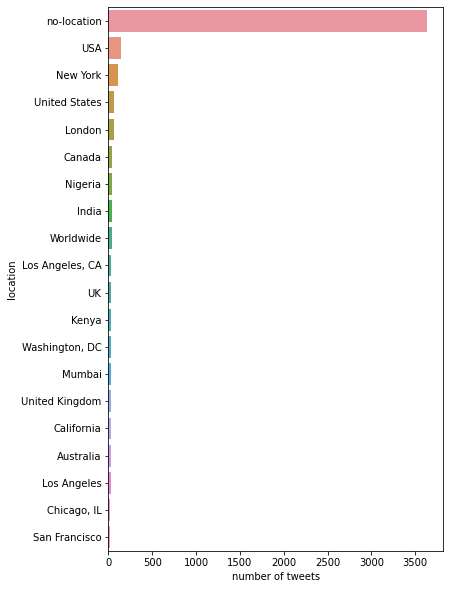

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top20Locations = wholeData.groupby(['location']).count().text.sort_values(ascending = False)[:20]
plt.figure(figsize = (6,10))
sns.barplot(x = top20Locations, y = top20Locations.index);
plt.xlabel('number of tweets');

### KeyWords

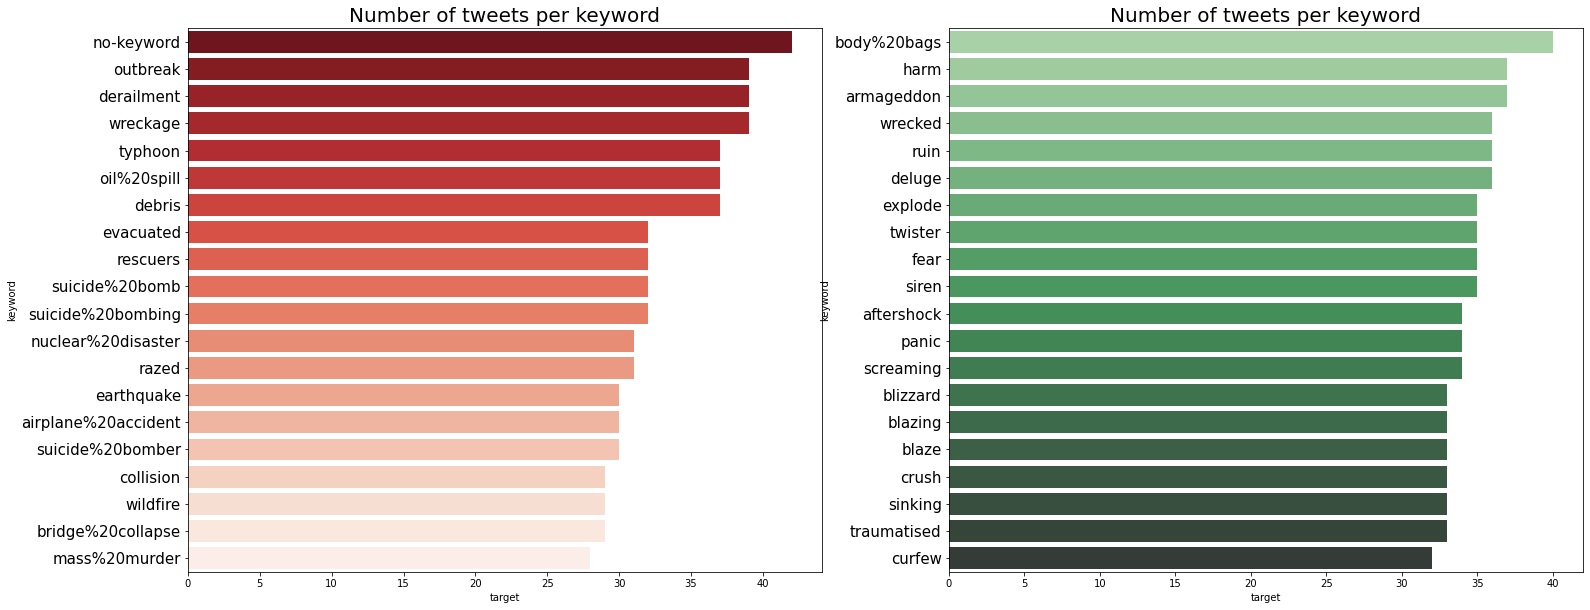

In [ ]:
top20KeywordsDisastrous  = train_data[train_data.target == 1].groupby(['keyword']).count().sort_values(by = 'target', ascending = False)[:20]

top20KeywordsNonDisastrous =  train_data[train_data.target == 0].groupby(['keyword']).count().sort_values(by = 'target', ascending = False)[:20]


fig, ax_ = plt.subplots(1, 2, figsize = (25,10))

# left side, the plot for keywords in disastrous tweets

sns.barplot(x = top20KeywordsDisastrous.target, # count of each keyword
            y = top20KeywordsDisastrous.index, # index of this df is our keywords
            ax = ax_[0],
            palette = 'Reds_r', label = 'dis')

sns.barplot(x = top20KeywordsNonDisastrous.target, y = top20KeywordsNonDisastrous.index, 
            ax = ax_[1], palette = 'Greens_d', label = 'non_dis')
    

for ax in [ax_[0], ax_[1]]:
    
    ax.set_title('Number of tweets per keyword', fontsize = 20) # setting title
    ax.set_yticklabels(labels =ax.get_yticklabels() ,
                       fontsize = 15)

Drop Locations with two reason:

1) We have **33%** null values

2) Logically loactions dosen't **related** to our task.

In the other hands we should drop keyword. And just like loactions, keyword dosen't related, so we drop it.


## Check target

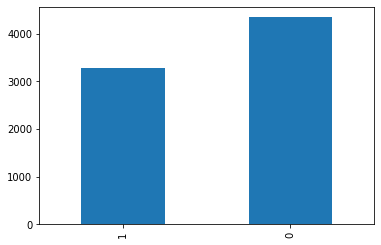

In [ ]:
train_data.target.value_counts().sort_values().plot(kind = 'bar')

As we can see our target is balanced. So we don't need any data processing for targets.

# Data preparation

## Make fucntions for pipeline

### Remove Punctaution

In [ ]:
import string 

# Create a function for removing punctuation
def RemovePunctaution(text):
    noPunctaution = [words for words in text if words not in string.punctuation]
    return ''.join(noPunctaution)

### Convert uppercsae to lowercase

In [ ]:
# Make a fucntion for convert Upper letter to lower letter
def UpperToLower(text):
    noUpperCase = [words.lower() for words in text]
    return ''.join(noUpperCase)


### Download requirement

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Testing nltk 
stopWords = nltk.corpus.stopwords.words('english')
len(stopWords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


179

### Stopwords

In [ ]:
# Create a Function for removing stop word

def RemoveStopWords(text):
  stopWords = nltk.corpus.stopwords.words('english')
  noStopWords = [word for word in text if word not in stopWords]
  return noStopWords

### Tokenizing

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

def Tokening(string):
  tokens = word_tokenize(string)
  return tokens

### Lemmatization

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

def Lemmatizer(vector):
  lemmatizer = WordNetLemmatizer()
  lemmatizeWords = [lemmatizer.lemmatize(word) for word in vector]
  return lemmatizeWords

### Remove emojis

In [ ]:
import re

def RemoveEmojis(text):

  emojiPatterns = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
  return emojiPatterns.sub(r'', text) # no emoji

### Convert to text

In [ ]:
def ConvertArrayToText(vector):
  return ' '.join(vector)

## Make pipeline

In [ ]:
import re
def Pipline(data):
  data['text-after-cleaning'] = data['text'].apply(lambda x : re.sub(r'@\w+','',x))
  data['text-after-cleaning'] = data['text-after-cleaning'].apply(lambda x : re.sub(r"http\S+", '', x))
  data['text-after-cleaning'] = data['text-after-cleaning'].apply(lambda x : re.sub(r"[0-9]+", '', x))
  data['text-after-cleaning'] = data['text-after-cleaning'].apply(lambda x : RemoveEmojis(x))
  data['text-after-cleaning'] = data['text-after-cleaning'].apply(lambda x : RemovePunctaution(x))
  data['text-after-cleaning'] = data['text-after-cleaning'].apply(lambda x : UpperToLower(x))
  data['text-after-cleaning'] = data['text-after-cleaning'].apply(lambda x : Tokening(x))
  data['text-after-cleaning'] = data['text-after-cleaning'].apply(lambda x : RemoveStopWords(x))
  data['text-after-cleaning'] = data['text-after-cleaning'].apply(lambda x : Lemmatizer(x))
  data['text-after-cleaning'] = data['text-after-cleaning'].apply(lambda x : ConvertArrayToText(x))


In [ ]:
# fit our pipeline and add new section named text-after-cleaning
id = test_data['id']
Pipline(train_data)
Pipline(test_data)

In [ ]:
# Test pipeline

import random
randomIndex = random.randint(0, len(train_data)-5) 
for row in train_data[["text-after-cleaning", "target"]][randomIndex:randomIndex+5].itertuples():
  _, text, target = row
  print(f'Original: {train_data.text.iloc[[row[0]]]}')
  print(f"row : {randomIndex} Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Original: 668    I liked a @YouTube video http://t.co/N95IGskd3p Minecraft: Episode 2 'Blaze Farm Beginnings!'
Name: text, dtype: object
row : 668 Target: 0 (not real disaster)
Text:
liked video minecraft episode blaze farm beginning

---

Original: 669    Property losses from #California wildfire nearly double as week-old blaze rages: The fireÛ_ http://t.co/MsdizftZ2g
Name: text, dtype: object
row : 668 Target: 1 (real disaster)
Text:
property loss california wildfire nearly double weekold blaze rage fireû

---

Original: 670    @ChristyCroley Not in the works yet. Did you see the new Vela Short in Blaze? http://t.co/Q8rEoEVluE
Name: text, dtype: object
row : 668 Target: 0 (not real disaster)
Text:
work yet see new vela short blaze

---

Original: 671    @UABStephenLong @courtlizcamp Total tweet fail! You are so beautiful inside and out Blaze On!
Name: text, dtype: object
row : 668 Target: 0 (not real disaster)
Text:
total tweet fail beautiful inside blaze

---

Original: 672    The

# Extra: build fucntions that we are going to use in next lines

## Score function

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Create a function for cal. score of our model ( will be used on other models)
def CalculateResults(yTrue, yPred):

  # Calculate model accuracy
  modelAccuracy = accuracy_score(yTrue, yPred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  modelPrecision, modelRecall, modelF1, _ = precision_recall_fscore_support(yTrue, yPred, average="weighted")
  modelResults = {"accuracy": modelAccuracy,
                  "precision": modelPrecision,
                  "recall": modelRecall,
                  "f1": modelF1}
  return modelResults

# Modeling

**Note**: In all classic models I've used whole data and haven't split data for scoring kaggle while this is not the case for RNN models.

## Model 1: MultinomialNB Kaggle Score: 79.7 %

In [ ]:
# Split data
from sklearn.model_selection import train_test_split
xTrain, xVal, yTrain, yVal = train_test_split(train_data["text-after-cleaning"].to_numpy(),
                                                                            train_data["target"].to_numpy(),
                                                                            test_size=0.15,
                                                                            random_state=55)


xTest = test_data['text-after-cleaning']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model1 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model1.fit(xTrain, yTrain)



Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
yPred = model1.predict(xVal)
result1 = CalculateResults(yVal,yPred)
result1

{'accuracy': 79.7723292469352,
 'f1': 0.7932488875497823,
 'precision': 0.8027576092168892,
 'recall': 0.797723292469352}

## Model2: SVM Kaggle Score:80.08%

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer

clf =  SVC()

model2 = Pipeline([
                    ("countVector", CountVectorizer()), # convert words to numbers using countVector
                    ("clf", MultinomialNB()) # model the text
])

model2.fit(xTrain,yTrain)


Pipeline(memory=None,
         steps=[('countVector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
yPred = model2.predict(xVal)
result2 = CalculateResults(yVal,yPred)
result2

{'accuracy': 79.24693520140104,
 'f1': 0.7907659651261962,
 'precision': 0.7920764237784457,
 'recall': 0.7924693520140105}

## Model3: Pure LSTM

In [ ]:
%tensorflow_version 2.3

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.3`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
from sklearn.model_selection import train_test_split

xTrain, xVal, yTrain, yVal = train_test_split(train_data["text-after-cleaning"].to_numpy(),
                                                                            train_data["target"].to_numpy(),
                                                                            test_size=0.15,
                                                                            random_state=55)

xTest = test_data['text-after-cleaning']

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

textVector = TextVectorization(max_tokens=None,
                                    standardize="lower_and_strip_punctuation", 
                                    split="whitespace",
                                    ngrams=None, 
                                    output_mode="int",
                                    output_sequence_length=None) 


In [ ]:
textVector.adapt(xTrain)

In [ ]:

from tensorflow import keras
import tensorflow as tf
tf.random.set_seed(42)


model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Input(shape=(1,), dtype="string"))
model3.add(textVector)
model3.add(tf.keras.layers.Embedding(input_dim=1000,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=15,
                                     name="embedding_1"))
model3.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(15, return_sequences = True, recurrent_dropout=0.2)))
model3.add(tf.keras.layers.GlobalMaxPool1D())
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(15, activation = "relu"))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(15, activation = "relu"))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))




In [ ]:
# Compile model
model3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
xTrain = tf.convert_to_tensor(xTrain, dtype=tf.string)
yTrain = tf.convert_to_tensor(yTrain, dtype=tf.int32)
xVal = tf.convert_to_tensor(xVal, dtype=tf.string)
yVal = tf.convert_to_tensor(yVal, dtype=tf.int32)

In [ ]:
# Train model
model3History = model3.fit(xTrain,
                              yTrain,
                              epochs=5,
                              validation_data=(xVal, yVal))

Epoch 1/5
203/203 [==============================] - 51s 211ms/step - loss: 0.6791 - accuracy: 0.5797 - val_loss: 0.6731 - val_accuracy: 0.5709
Epoch 2/5
203/203 [==============================] - 42s 205ms/step - loss: 0.5881 - accuracy: 0.6942 - val_loss: 0.5851 - val_accuracy: 0.7434
Epoch 3/5
203/203 [==============================] - 42s 209ms/step - loss: 0.5294 - accuracy: 0.7568 - val_loss: 0.5033 - val_accuracy: 0.7750
Epoch 4/5
203/203 [==============================] - 41s 204ms/step - loss: 0.4958 - accuracy: 0.7815 - val_loss: 0.4784 - val_accuracy: 0.7636
Epoch 5/5
203/203 [==============================] - 41s 201ms/step - loss: 0.4712 - accuracy: 0.7904 - val_loss: 0.4616 - val_accuracy: 0.7758


In [ ]:
yPred = model3.predict(xVal)
yPred = tf.squeeze(tf.round(yPred))
result3 = CalculateResults(yVal,yPred)
result3

{'accuracy': 77.5831873905429,
 'f1': 0.7671387230617026,
 'precision': 0.7886035272383582,
 'recall': 0.7758318739054291}

## Model 4: BERT

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.2 MB/s 
     |████████████████████████████████| 596 kB 49.6 MB/s 
     |████████████████████████████████| 59 kB 5.9 MB/s 
     |████████████████████████████████| 3.3 MB 17.3 MB/s 
     |████████████████████████████████| 895 kB 37.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import transformers
tokenizer = transformers.AutoTokenizer.from_pretrained('bert-large-uncased')
BERT = transformers.TFBertModel.from_pretrained('bert-large-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-large-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-large-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
print("max len of tweets",max([len(x.split()) for x in train_data['text-after-cleaning']]))

max len of tweets 23


In [ ]:
xTrain = tokenizer(
    text=train_data['text-after-cleaning'].tolist(),
    add_special_tokens=True,
    max_length=23,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [ ]:
xTest = tokenizer(
    text=test_data['text-after-cleaning'].tolist(),
    add_special_tokens=True,
    max_length=23,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [ ]:
maxLen = 23

inputIds = tf.keras.layers.Input(shape=(maxLen,), dtype=tf.int32, name="input_ids")
inputMask = tf.keras.layers.Input(shape=(maxLen,), dtype=tf.int32, name="attention_mask")

embeddings = BERT(inputIds,attention_mask = inputMask)[1] 

out = tf.keras.layers.Dropout(0.1)(embeddings)
out = tf.keras.layers.Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = tf.keras.layers.Dense(32,activation = 'relu')(out)

y = tf.keras.layers.Dense(1,activation = 'sigmoid')(out)
    
model4 = tf.keras.Model(inputs=[inputIds, inputMask], outputs=y)
model4.layers[2].trainable = True

In [ ]:
model4.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 23)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 23)]         0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 335141888   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dropout_78 (Dropout)            (None, 1024)         0           tf_bert_model[1][1]        

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=6e-06, # this learning rate is taken from huggingface website 
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)

# Set loss and metrics
loss = tf.keras.losses.BinaryCrossentropy(from_logits = True)
metric = tf.keras.metrics.BinaryAccuracy('accuracy'),
# Compile the model
model4.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric)

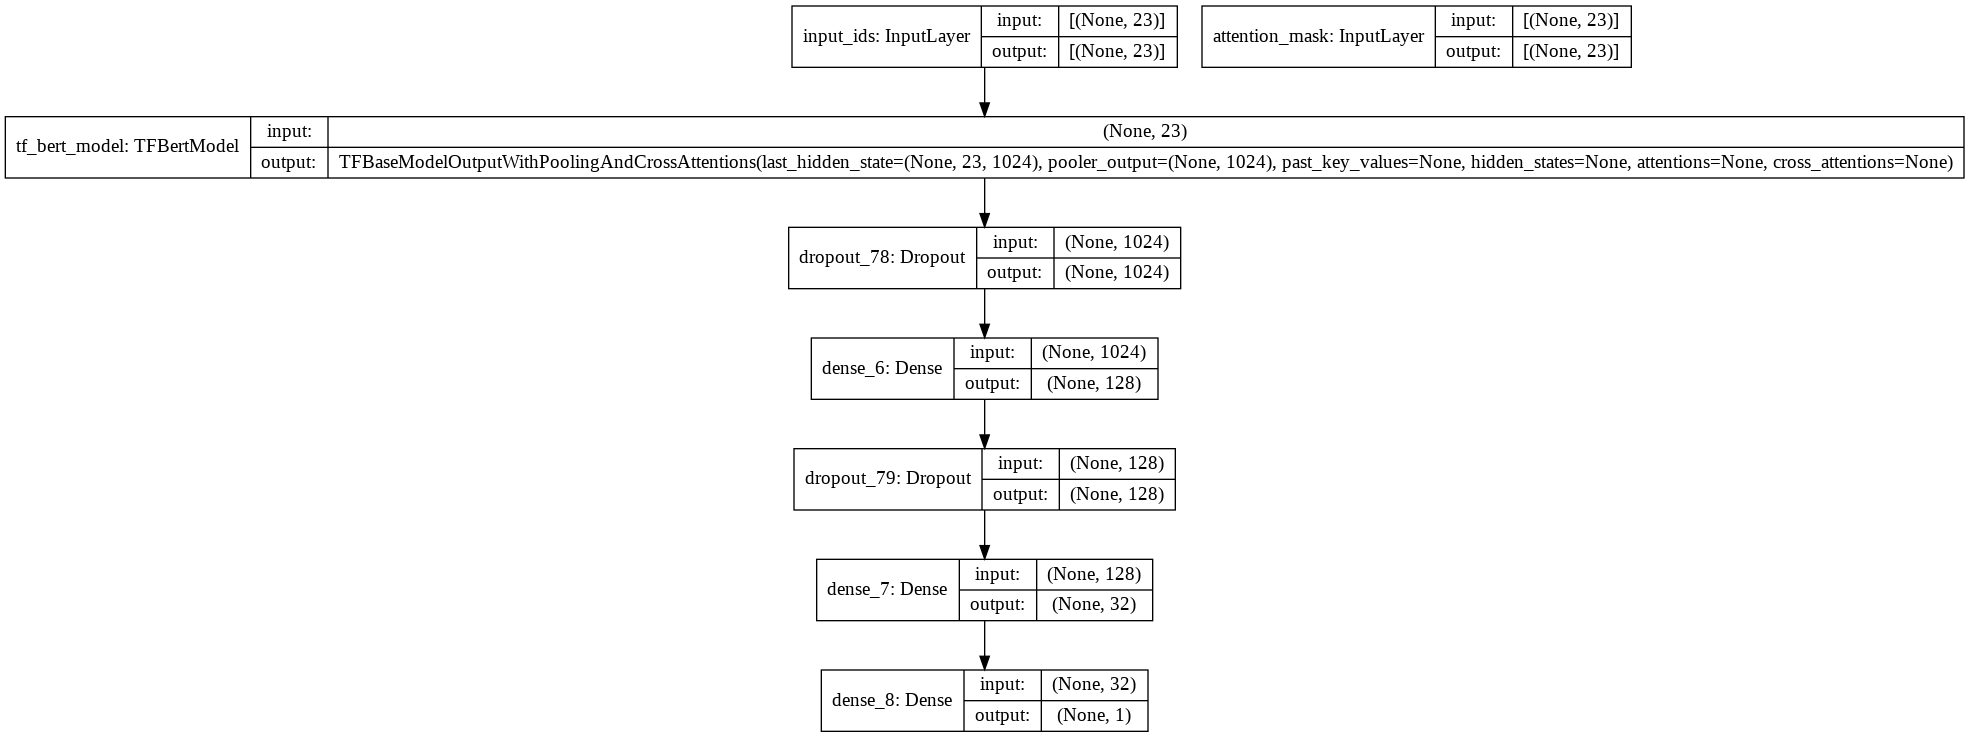

In [ ]:
tf.keras.utils.plot_model(model4, show_shapes = True)

In [ ]:
model4History = model4.fit(
    x ={'input_ids':xTrain['input_ids'],'attention_mask':xTrain['attention_mask']} ,
    y = train_data['target'],
#     validation_split = 0.1,
  epochs=12,
    batch_size=32
)

Epoch 1/12


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4994: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


238/238 [==============================] - 329s 1s/step - loss: 0.5520 - accuracy: 0.7343
Epoch 2/12
238/238 [==============================] - 272s 1s/step - loss: 0.4323 - accuracy: 0.8218
Epoch 3/12
238/238 [==============================] - 272s 1s/step - loss: 0.4099 - accuracy: 0.8328
Epoch 4/12
238/238 [==============================] - 272s 1s/step - loss: 0.3888 - accuracy: 0.8396
Epoch 5/12
238/238 [==============================] - 272s 1s/step - loss: 0.3726 - accuracy: 0.8516
Epoch 6/12
238/238 [==============================] - 272s 1s/step - loss: 0.3696 - accuracy: 0.8508
Epoch 7/12
238/238 [==============================] - 272s 1s/step - loss: 0.3657 - accuracy: 0.8556
Epoch 8/12
238/238 [==============================] - 273s 1s/step - loss: 0.3608 - accuracy: 0.8576
Epoch 9/12
238/238 [==============================] - 273s 1s/step - loss: 0.3572 - accuracy: 0.8595
Epoch 10/12
238/238 [==============================] - 273s 1s/step - loss: 0.3487 - accuracy: 0.8648


In [ ]:
yPred = model4.predict({'input_ids':xTest['input_ids'],'attention_mask':xTest['attention_mask']})

In [ ]:
yPred = (np.where(yPred>0.5,1,0)).reshape((1,3263))[0]

In [ ]:

resaultDataframe = pd.DataFrame({'id':id,'target':yPred})
resaultDataframe.to_csv('submission.csv',index=False)